In [3]:
import pandas as pd
import numpy as np
import os
print(os.getcwd())
train = pd.read_csv("train_labels.csv")
#test = pd.read_csv("digits_test.csv")
#train.shape
#test.shape
print(train.head())

#about half are invasive

C:\Users\cform_75xk7s9\Documents\Kaggle Data Sets\Species
   name  invasive
0     1         0
1     2         0
2     3         1
3     4         0
4     5         1


Height:866 Width:1154


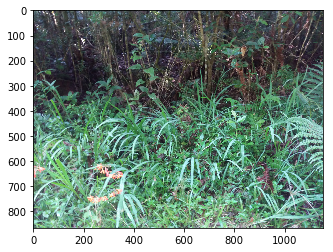

In [4]:
from skimage import io, transform
import matplotlib.pyplot as plt
%matplotlib inline
train_path = 'C:/Users/cform_75xk7s9/Documents/Kaggle Data Sets/Species/train/'
test_path = 'C:/Users/cform_75xk7s9/Documents/Kaggle Data Sets/Species/test/'
sample_image = io.imread(train_path + '1.jpg')
print('Height:{0} Width:{1}'.format(sample_image.shape[0], sample_image.shape[1]))
plt.imshow(sample_image)

In [33]:
import warnings 
warnings.filterwarnings('ignore')

#kernel memory error if go bigger
x_train = np.empty(shape=(2295, 150, 200, 3)) #number of pics, height, width, 3 for blue,red,green
#x_validate = np.empty(shape=(100, 150, 200, 3)) #number of pics, height, width, 3 for blue,red,green
x_test = np.empty(shape=(1531, 150, 200, 3)) #number of pics, height, width, 3 for blue,red,green

for i in range(2295):
    tr_im = io.imread(train_path + str(i+1) + '.jpg')
    x_train[i] = transform.resize(tr_im, output_shape=(150, 200, 3)) #this resizes our picture so we get a good view still
#for i in range(100):
#    tr_im = io.imread(train_path + str(i+201) + '.jpg')
#    x_validate[i] = transform.resize(tr_im, output_shape=(150, 200, 3))
for i in range(1531):
    tr_im = io.imread(test_path + str(i+1) + '.jpg')
    x_test[i] = transform.resize(tr_im, output_shape=(150, 200, 3))

Try to just make a simple NN (yes it will probably be bad)

In [6]:
#now keras with regular Neural Network!
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from keras.utils.np_utils import to_categorical


neural_net_form = np.empty(shape=(2295, 90000))
#neural_net_val = np.empty(shape=(100, 90000))
neural_net_test = np.empty(shape=(1531, 90000))
for i in range(2295):
    neural_net_form[i] = (x_train[i].flatten())
#for i in range(100):
#    neural_net_val[i] = (x_validate[i].flatten())
for i in range(1531):
    neural_net_test[i] = (x_test[i].flatten())
np.shape(neural_net_form)

Using TensorFlow backend.


(2295, 90000)

In [7]:
y_train = np.array(train.invasive.values)
train_labels = to_categorical(y_train) #gives us two columns. One for yes to invasive and one to no invasive


#building the model and use dropout to avoid overfitting
model=Sequential()
model.add(Dense(1000,activation='relu',input_dim=(90000)))
model.add(Dropout(0.2))
model.add(Dense(750,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax')) #number of outputs

In [8]:
#metrics to judge it on
model.compile(optimizer="sgd",
 loss='categorical_crossentropy', #log loss
 metrics=['accuracy'])

In [9]:
history=model.fit(neural_net_form, train_labels, validation_split = .2, 
            nb_epoch=100, batch_size=50)

Train on 1836 samples, validate on 459 samples
Epoch 1/100
1836/1836 [==============================] - 56s - loss: 0.6962 - acc: 0.5779 - val_loss: 0.6392 - val_acc: 0.6405
Epoch 2/100
1836/1836 [==============================] - 54s - loss: 0.6557 - acc: 0.6351 - val_loss: 0.6354 - val_acc: 0.6362
Epoch 3/100
1836/1836 [==============================] - 57s - loss: 0.6372 - acc: 0.6476 - val_loss: 0.6120 - val_acc: 0.6645
Epoch 4/100
1836/1836 [==============================] - 59s - loss: 0.6159 - acc: 0.6672 - val_loss: 0.5979 - val_acc: 0.6993
Epoch 5/100
1836/1836 [==============================] - 54s - loss: 0.6014 - acc: 0.6879 - val_loss: 0.5994 - val_acc: 0.6580
Epoch 6/100
1836/1836 [==============================] - 52s - loss: 0.5941 - acc: 0.7048 - val_loss: 0.6306 - val_acc: 0.7037
Epoch 7/100
1836/1836 [==============================] - 51s - loss: 0.5866 - acc: 0.7102 - val_loss: 0.5812 - val_acc: 0.7081
Epoch 8/100
1836/1836 [==============================] - 53s - l

In [11]:

#it doesnt even predict some numbers
from sklearn import metrics
predictions = model.predict_classes(neural_net_form, verbose=0)
test_pred = model.predict_classes(neural_net_test, verbose=0)
print("Misclassification Rate: ", np.mean(predictions != train.invasive.values))
metrics.confusion_matrix(predictions, train.invasive.values)

Misclassification Rate:  0.107189542484


array([[ 654,   53],
       [ 193, 1395]])

In [12]:
results = pd.DataFrame({"name": range(1,1532), "invasive": test_pred})

print(results.head())
results["invasive"].value_counts()

results.to_csv("invasive_results.csv",  index = False, columns=["name","invasive"])

   invasive  name
0         0     1
1         0     2
2         1     3
3         0     4
4         1     5


In [25]:
#set up requirements of cnn
nb_epoch = 50 # Change to 1 if want to run much much quicker

batch_size = 100
img_rows, img_cols = 866, 1154

nb_filters_1 = 20 # change to smaller if want to run faster
nb_filters_2 = 40 # change to smaller if want to run faster
nb_filters_3 = 64 # change to smaller if want to run faster
nb_conv = 3 #how big of a square for the filter (3X3)

In [26]:
#begin cnn
import keras.layers.convolutional as conv
cnn = Sequential()

#1st convolution layer
#border_mode ='same' returns same output dimensions as input dimensions... does so by zero padding the edges
#when dealing with grayscale, input_shape must have a 1 dimension... color would have 3.
#relu just makes negative values zero, thats what it does.
cnn.add(conv.Convolution2D(nb_filters_1, nb_conv, nb_conv,  activation="relu", input_shape=(150, 200,3), border_mode='same'))

#2nd convolution layer
cnn.add(conv.Convolution2D(nb_filters_1, nb_conv, nb_conv, activation="relu", border_mode='same'))

#max pool on 2X2
cnn.add(conv.MaxPooling2D(strides=(2,2)))

In [27]:
#3rd convolution layer
cnn.add(conv.Convolution2D(nb_filters_2, nb_conv, nb_conv, activation="relu", border_mode='same'))

#4th convolution layer
cnn.add(conv.Convolution2D(nb_filters_2, nb_conv, nb_conv, activation="relu", border_mode='same'))

#max pool on 2X2
cnn.add(conv.MaxPooling2D(strides=(2,2)))

In [28]:
#5th convolution layer
cnn.add(conv.Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same'))

#6th convolution layer
cnn.add(conv.Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same'))

#7th convolution layer
cnn.add(conv.Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same'))

#8th convolution layer
cnn.add(conv.Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same'))

#max pool on 2X2
cnn.add(conv.MaxPooling2D(strides=(2,2)))

In [29]:
#now take into the fully connected phase to gather results
import keras.layers.core as core
cnn.add(core.Flatten()) #so input is just like how you would put in a typical neural network
cnn.add(core.Dropout(0.2)) #control overfitting
cnn.add(core.Dense(100, activation="relu")) # use 100 as that is our batch size

#final nn layer
cnn.add(core.Dense(2, activation="softmax")) 

In [30]:
cnn.summary() #prints what the algorithm we used actually was


cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

cnn.fit(x_train, train_labels, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_9 (Convolution2D)  (None, 150, 200, 20)  560         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 150, 200, 20)  3620        convolution2d_9[0][0]            
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 75, 100, 20)   0           convolution2d_10[0][0]           
____________________________________________________________________________________________________
convolution2d_11 (Convolution2D) (None, 75, 100, 40)   7240        maxpooling2d_4[0][0]             
___________________________________________________________________________________________

In [35]:
predictions = cnn.predict_classes(x_test)
#print("Misclassification Rate: ", np.mean(predictions != train["label"]))
#metrics.confusion_matrix(predictions, train["label"])

results = pd.DataFrame({"name": range(1,1532), "invasive": predictions})

print(results.head())
results["invasive"].value_counts()

results.to_csv("invasive_results_cnn.csv",  index = False, columns=["name","invasive"])

print("Results have been saved!")

   invasive  name
0         1     1
1         0     2
2         0     3
3         0     4
4         0     5
Results have been saved!
